In [51]:
import pandas as pd
import numpy as np
df=pd.read_csv("worldometer_snapshots_April18_to_May18.csv")
df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,4/18/2020,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,4/18/2020,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,4/18/2020,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,4/18/2020,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,4/18/2020,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0
...,...,...,...,...,...,...,...,...,...
6598,5/18/2020,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,5/18/2020,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,5/18/2020,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,5/18/2020,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0


In [32]:
df.isnull().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

In [33]:
df.dropna(inplace=True)

In [34]:
df.dtypes

Date                    object
Country                 object
Population               int64
Total Tests            float64
Total Cases            float64
Total Deaths           float64
Total Recovered        float64
Serious or Critical    float64
Active Cases           float64
dtype: object

In [35]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

lb = LabelEncoder()
Country = lb.fit_transform(df['Country'])
df['Country'] = Country

In [36]:
#checking number of rows and columns n dataset
df.shape

(3514, 9)

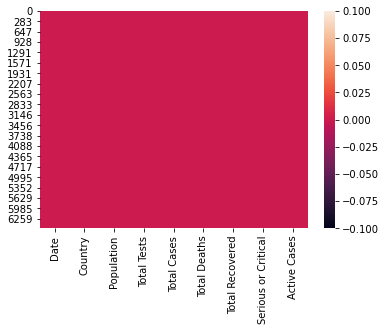

In [37]:
#checking null values using heatmap
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull())

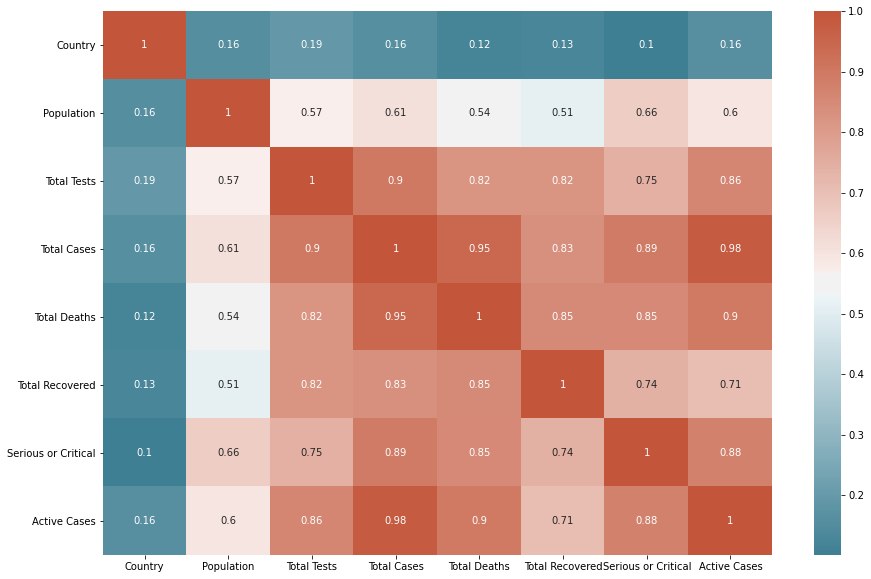

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt  
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [39]:
df.corr(method ='kendall') 

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
Country,1.000000,0.135660,0.167771,0.103918,0.059347,0.071625,0.065469,0.105444
Population,0.135660,1.000000,0.433597,0.455871,0.438832,0.403253,0.350828,0.457449
Total Tests,0.167771,0.433597,1.000000,0.660632,0.512517,0.665133,0.484643,0.558251
Total Cases,0.103918,0.455871,0.660632,1.000000,0.743284,0.759382,0.653590,0.818920
Total Deaths,0.059347,0.438832,0.512517,0.743284,1.000000,0.633551,0.648806,0.673480
Total Recovered,0.071625,0.403253,0.665133,0.759382,0.633551,1.000000,0.579709,0.578504
Serious or Critical,0.065469,0.350828,0.484643,0.653590,0.648806,0.579709,1.000000,0.618825
Active Cases,0.105444,0.457449,0.558251,0.818920,0.673480,0.578504,0.618825,1.000000


Population                 AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Tests             AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Total Cases              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
Total Deaths            AxesSubplot(0.606034,0.71587;0.133621x0.16413)
Total Recovered         AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Serious or Critical       AxesSubplot(0.125,0.518913;0.133621x0.16413)
Active Cases           AxesSubplot(0.285345,0.518913;0.133621x0.16413)
dtype: object

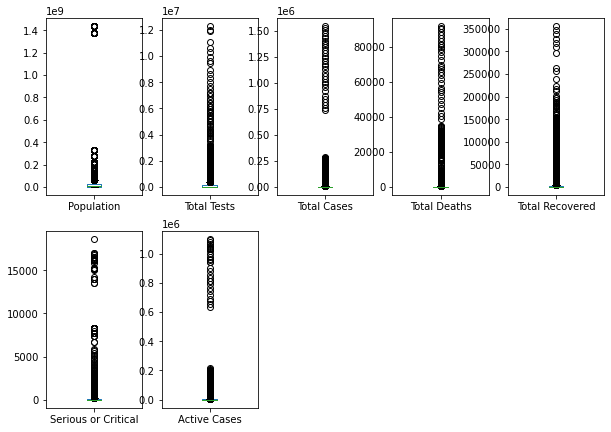

In [40]:
#ploting boxplot for each column to chek outliars
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(10,15))

In [41]:
df.skew

<bound method DataFrame.skew of            Date  Country  Population  Total Tests  Total Cases  Total Deaths  \
0     4/18/2020      121   330774664    3722145.0     738792.0       39014.0   
1     4/18/2020      102   145927292    1831892.0      36793.0         313.0   
2     4/18/2020      113    46752703     930230.0     194416.0       20043.0   
3     4/18/2020       21   212380932      62985.0      36722.0        2361.0   
5     4/18/2020       62    60471924    1305833.0     175925.0       23227.0   
...         ...      ...         ...          ...          ...           ...   
6554  5/18/2020       11      392795       1826.0         96.0          11.0   
6556  5/18/2020       14      287335       4004.0         88.0           7.0   
6559  5/18/2020      109       42817        414.0         77.0          15.0   
6560  5/18/2020       75    19066433       1803.0         70.0           3.0   
6571  5/18/2020        4       97833        183.0         25.0           3.0   

      T

In [42]:
skew=('Country','Population','Total Tests','Total Cases','Total Deaths','Total Recovered','Serious or Critical','Active Cases')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [43]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])      

In [44]:
from scipy.stats import zscore
z_score=abs(zscore(df))
df_final= df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(3476, 9)


In [45]:
#saperate input and target variabke
import numpy as np
y=df_final["Active Cases"]
df_x=df_final.drop(columns=["Active Cases"])
print(df_x.shape)
print(y.shape)


(3476, 8)
(3476,)


In [46]:
#calculating r2 score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,Y_test=train_test_split(df_x,y,random_state=55,test_size=0.20)
model=[DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
from sklearn.decomposition import PCA
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,Y_test=train_test_split(df_x,y,random_state=r_state,test_size=0.33)
    for i in model:
        i.fit(x_train,y_train)
        pre=i.predict(x_test)
        r2_sc=r2_score(Y_test,pre)
        print("max r2 score corrospond to random state",r_state,"is",r2_sc)
        if r2_sc>max_r_score:
            max_r_score=r2_sc
            final_r_state=r_state
            final_model=i
            print()
            print()
            print()
            print()
            print("max r2 score corrospond to random state",final_r_state,"is",max_r_score,"and model is",final_model)
 

max r2 score corrospond to random state 42 is 0.9967312765155949




max r2 score corrospond to random state 42 is 0.9967312765155949 and model is DecisionTreeRegressor()
max r2 score corrospond to random state 42 is 0.9545273682471779
max r2 score corrospond to random state 42 is 0.9269665419557785
max r2 score corrospond to random state 42 is 0.951210534357024
max r2 score corrospond to random state 42 is 0.9878957157424244
max r2 score corrospond to random state 43 is 0.9941971851267448
max r2 score corrospond to random state 43 is 0.9562659459878924
max r2 score corrospond to random state 43 is 0.9174812651009427
max r2 score corrospond to random state 43 is 0.954152372197913
max r2 score corrospond to random state 43 is 0.985517947601987
max r2 score corrospond to random state 44 is 0.9920327844518446
max r2 score corrospond to random state 44 is 0.9598372865624318
max r2 score corrospond to random state 44 is 0.9230750752581327
max r2 score corrospond to random state 44 is 0.9507

max r2 score corrospond to random state 66 is 0.9851665525075564
max r2 score corrospond to random state 67 is 0.9944768267653963
max r2 score corrospond to random state 67 is 0.9491605762390686
max r2 score corrospond to random state 67 is 0.9187464906045323
max r2 score corrospond to random state 67 is 0.9539653704895998
max r2 score corrospond to random state 67 is 0.9859700590079497
max r2 score corrospond to random state 68 is 0.9919130608044611
max r2 score corrospond to random state 68 is 0.9594185783917869
max r2 score corrospond to random state 68 is 0.9232542077160903
max r2 score corrospond to random state 68 is 0.952449753564269
max r2 score corrospond to random state 68 is 0.9860066867144379
max r2 score corrospond to random state 69 is 0.9950732635484636
max r2 score corrospond to random state 69 is 0.9533551249861345
max r2 score corrospond to random state 69 is 0.9224356067934558
max r2 score corrospond to random state 69 is 0.9578281719769792
max r2 score corrospond to

max r2 score corrospond to random state 91 is 0.9868105045345967
max r2 score corrospond to random state 92 is 0.9953401692965926
max r2 score corrospond to random state 92 is 0.94782028090635
max r2 score corrospond to random state 92 is 0.9190764107863343
max r2 score corrospond to random state 92 is 0.9544658579668636
max r2 score corrospond to random state 92 is 0.9859996804440018
max r2 score corrospond to random state 93 is 0.9952331052031134
max r2 score corrospond to random state 93 is 0.956818870063697
max r2 score corrospond to random state 93 is 0.92763101348138
max r2 score corrospond to random state 93 is 0.9540113131639605
max r2 score corrospond to random state 93 is 0.9868460050532729
max r2 score corrospond to random state 94 is 0.9903190329363812
max r2 score corrospond to random state 94 is 0.9627012682583052
max r2 score corrospond to random state 94 is 0.9165557863276811
max r2 score corrospond to random state 94 is 0.9527265878717842
max r2 score corrospond to ran

In [47]:
x_train,x_test,y_train,Y_test=train_test_split(df_x,y,random_state=91,test_size=0.20)
lreg=linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [48]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),df_x,y,cv=10,scoring="r2").mean()

0.9550142985325696

In [49]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("r2 score is",r2_score(Y_test,y_pred))
print("RMSE is",np.sqrt(mean_squared_error(Y_test,y_pred)))

r2 score is 0.9438969661749596
RMSE is 0.5389079740199636


In [50]:
import joblib
joblib.dump(lreg,'covid.pkl')

['covid.pkl']